<a href="https://colab.research.google.com/github/carloder/data/blob/master/anpris_4__Manuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown # 1.1. Montar  drive .... 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import io
import pandas as pd
#df2 = pd.read_csv('https://raw.githubusercontent.com/carloder/data/master/tajo.csv', error_bad_lines=False, encoding = "ISO-8859-1", header=None)
#df2 = pd.read_csv(io.BytesIO(uploaded['soil.csv']), error_bad_lines=False, encoding = "ISO-8859-1", header=None)
#@markdown # 1.2.Enter a file path:
file_path = '/content/drive/My Drive/anpris/df - Copie.csv' #@param {type:"string"}
df = pd.read_csv(file_path, error_bad_lines=False, encoding = "ISO-8859-1") #, encoding = "ISO-8859-1", header=None
df['Timee'] = pd.to_datetime(df['Time'], errors='coerce')
df.sort_values(by=['PointNo','Time'], inplace=True)
#df.to_csv(r'df1.csv')# descarga
df=df.reset_index(drop=True)
h1=sorted(list(set(df['PointNo'])))
end=len(h1)
df1=df

In [ ]:
df1

,Unnamed: 0,PointNo,ProfileName,H,V,D,PPMType,PPM,Pressure,Av_Temp,AddConst,TargetEasting,TargetNorthing,TargetElevation,ReflectorHeight,InstrumentHeight,StationEasting,StationNorthing,StationHeight,NullMeasurement,DiffFromNullMeas,ShortTimeDiff,LongTimeDiff,VelLimitDiff,DistProfileDirection,HorzDistance,DifferenceOutlierTest,State,TransverseDisplacement,HeightDisplacement,TargetPtID,CustomText1,Time,Magnitude2D,Magnitude3D,Trend,Plunge,id,idPointGroup,Timee
0,79704,PBN_03,NaN,0.440309,1.569978,1146.800621,NaN,NaN,NaN,NaN,NaN,413820.6033,8029311.186,4295.713280,NaN,NaN,NaN,NaN,NaN,NaN,-0.034739,NaN,NaN,NaN,NaN,1146.005239,NaN,1,0.019266,0.020280,5,C01_BN,1/01/2019 00:02,0,0,0,0,120166,79705,2019-01-01 00:02:00
1,79731,PBN_03,NaN,0.440307,1.569974,1146.799821,NaN,NaN,NaN,NaN,NaN,413820.6013,8029311.185,4295.717897,NaN,NaN,NaN,NaN,NaN,NaN,-0.035543,NaN,NaN,NaN,NaN,1146.004435,NaN,1,0.017200,0.024897,5,C01_BN,1/01/2019 01:02,0,0,0,0,120196,79732,2019-01-01 01:02:00
2,79761,PBN_03,NaN,0.440309,1.569973,1146.799821,NaN,NaN,NaN,NaN,NaN,413820.5972,8029311.178,4295.718445,NaN,NaN,NaN,NaN,NaN,NaN,-0.042322,NaN,NaN,NaN,NaN,1145.997656,NaN,1,0.013333,0.025445,5,C01_BN,1/01/2019 02:02,0,0,0,0,120229,79762,2019-01-01 02:02:00
3,79793,PBN_03,NaN,0.440305,1.569975,1146.799321,NaN,NaN,NaN,NaN,NaN,413820.5900,8029311.181,4295.716091,NaN,NaN,NaN,NaN,NaN,NaN,-0.039430,NaN,NaN,NaN,NaN,1146.000548,NaN,1,0.006047,0.023091,5,C01_BN,1/01/2019 03:02,0,0,0,0,120264,79794,2019-01-01 03:02:00
4,79825,PBN_03,NaN,0.440307,1.569968,1146.799821,NaN,NaN,NaN,NaN,NaN,413820.5918,8029311.182,4295.724258,NaN,NaN,NaN,NaN,NaN,NaN,-0.038938,NaN,NaN,NaN,NaN,1146.001039,NaN,1,0.007862,0.031258,5,C01_BN,1/01/2019 04:02,0,0,0,0,120299,79826,2019-01-01 04:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80290,750782,TAJ_36,NaN,5.709444,1.551578,656.107670,NaN,NaN,NaN,NaN,NaN,414941.4831,8029550.288,4435.660326,NaN,NaN,NaN,NaN,NaN,NaN,0.460020,NaN,NaN,NaN,NaN,656.057862,NaN,1,-0.014423,0.117397,79,C02_TAJO,9/12/2019 17:01,0,0,0,0,1210838,750783,2019-09-12 17:01:00
80291,750909,TAJ_36,NaN,5.709456,1.551578,656.108970,NaN,NaN,NaN,NaN,NaN,414941.4844,8029550.284,4435.659832,NaN,NaN,NaN,NaN,NaN,NaN,0.460266,NaN,NaN,NaN,NaN,656.058108,NaN,1,-0.010830,0.116903,79,C02_TAJO,9/12/2019 18:01,0,0,0,0,1210965,750910,2019-09-12 18:01:00
80292,751036,TAJ_36,NaN,5.709459,1.551580,656.109370,NaN,NaN,NaN,NaN,NaN,414941.4846,8029550.283,4435.658702,NaN,NaN,NaN,NaN,NaN,NaN,0.460049,NaN,NaN,NaN,NaN,656.057890,NaN,1,-0.009710,0.115773,79,C02_TAJO,9/12/2019 19:01,0,0,0,0,1211092,751037,2019-09-12 19:01:00
80293,751189,TAJ_36,NaN,5.709461,1.551579,656.108770,NaN,NaN,NaN,NaN,NaN,414941.4848,8029550.283,4435.659195,NaN,NaN,NaN,NaN,NaN,NaN,0.460078,NaN,NaN,NaN,NaN,656.057920,NaN,1,-0.009125,0.116265,79,C02_TAJO,9/12/2019 21:01,0,0,0,0,1211245,751190,2019-09-12 21:01:00


In [ ]:
pip install fpdf

In [ ]:
pip install reportlab

In [ ]:
#import pyodbc
import matplotlib.pyplot as plt
from matplotlib import pylab
import altair as alt
from matplotlib.pyplot import figure
from fpdf import FPDF
import numpy as np

# **primera correcion de escala**

In [ ]:
df1['Este']=df1['TargetEasting']*0
df1['Norte']=df1['Este']*0
df1['Elevation']=df1['Norte']*0
for i in  range(0,end):
    dfi=df1[df1['PointNo'] == h1[i]]
    print(i) # imprimir esto demora 1 segundo más
    dfi['Este']=(dfi['TargetEasting']-dfi['TargetEasting'].head(1).values)
    dfi['Norte']=(dfi['TargetNorthing']-dfi['TargetNorthing'].head(1).values)
    dfi['Elevation']=(dfi['TargetElevation']-dfi['TargetElevation'].head(1).values)
    df1.update(dfi)
df1['y+m+d']=df1['Timee'].dt.year+df1['Timee'].dt.month/100+df1['Timee'].dt.day/10000

df1['mediandE']=df1.groupby(['PointNo','y+m+d'])["Este"].transform('median')
df1['meandE']=df1.groupby(['PointNo','y+m+d'])["Este"].transform('mean')
df1['stddE']=df1.groupby(['PointNo','y+m+d'])["Este"].transform('std')
df1['mediandN']=df1.groupby(['PointNo','y+m+d'])["Norte"].transform('median')
df1['meandN']=df1.groupby(['PointNo','y+m+d'])["Norte"].transform('mean')
df1['stddN']=df1.groupby(['PointNo','y+m+d'])["Norte"].transform('std')
df1['mediandEL']=df1.groupby(['PointNo','y+m+d'])["Elevation"].transform('median')
df1['meandEL']=df1.groupby(['PointNo','y+m+d'])["Elevation"].transform('mean')
df1['stddEL']=df1.groupby(['PointNo','y+m+d'])["Elevation"].transform('std')
#df1['modedE']=df1.groupby(['PointNo','y+m+d'])["Este"].transform(lambda x: x.value_counts().index[0])
#df1['modedN']=df1.groupby(['PointNo','y+m+d'])["Norte"].transform(lambda x: x.value_counts().index[0])
#df1['modedEL']=df1.groupby(['PointNo','y+m+d'])["Elevation"].transform(lambda x: x.value_counts().index[0])

df1['LsupE']=df1['mediandE']+1.5*df1['stddE']+0.001#2 des.std = 95.7%
df1['LinfE']=df1['mediandE']-1.5*df1['stddE']-0.001#2 des.std = 95.7%
df1['LsupN']=df1['mediandN']+1.5*df1['stddN']+0.001#2 des.std = 95.7%
df1['LinfN']=df1['mediandN']-1.5*df1['stddN']-0.001#2 des.std = 95.7%
df1['LsupEL']=df1['mediandEL']+1.5*df1['stddEL']+0.001#2 des.std = 95.7%
df1['LinfEL']=df1['mediandEL']-1.5*df1['stddEL']-0.001#2 des.std = 95.7%

df1['Este*']=((df1['Este']>df1['LinfE'])&(df1['Este']<df1['LsupE']))
df1['Norte*']=((df1['Norte']>df1['LinfN'])&(df1['Norte']<df1['LsupN']))
df1['Elevation*']=((df1['Elevation']>df1['LinfEL'])&(df1['Elevation']<df1['LsupEL']))
df2=df1[df1['Este*'] == True]
df2=df2[df2['Norte*'] == True]
df2=df2[df2['Elevation*'] == True]
df2=df2.reset_index(drop=True)

df1['mediandE']=df1.groupby(['PointNo','y+m+d'])["Este"].transform('median') #copiado de unas lineas de descarga de google 3 reglones mas abajo
df1['meandE']=df1.groupby(['PointNo','y+m+d'])["Este"].transform('mean')
df1['stddE']=df1.groupby(['PointNo','y+m+d'])["Este"].transform('std')

0
1
2
3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

4
5
6
7
8
9
10
11


# **promedio diario, no es necesario solo para control de datos**

In [ ]:
df2['meandE*']=df2.groupby(['PointNo','y+m+d'])["TargetEasting"].transform('mean')
df2['meandN*']=df2.groupby(['PointNo','y+m+d'])["TargetNorthing"].transform('mean')
df2['meandEL*']=df2.groupby(['PointNo','y+m+d'])["TargetElevation"].transform('mean')
PDi=df2.groupby(['PointNo','y+m+d']).head(1)
promediooo=PDi[['PointNo','Time','meandE*','meandN*','meandEL*']]
promediooo

,PointNo,Time,meandE*,meandN*,meandEL*
0,PBN_03,1/01/2019 00:02,413820.591100,8.029311e+06,4295.711667
15,PBN_03,1/02/2019 00:02,413820.571120,8.029311e+06,4295.715383
20,PBN_03,1/03/2019 00:03,413820.574282,8.029311e+06,4295.715611
37,PBN_03,1/04/2019 00:02,413820.578113,8.029311e+06,4295.708980
53,PBN_03,1/05/2019 00:03,413820.589643,8.029311e+06,4295.699864
...,...,...,...,...,...
60760,TAJ_36,9/07/2019 00:01,414941.487995,8.029550e+06,4435.581143
60779,TAJ_36,9/09/2019 00:01,414941.482195,8.029550e+06,4435.653127
60800,TAJ_36,9/10/2019 00:01,414941.484038,8.029550e+06,4435.658146
60821,TAJ_36,9/11/2019 01:01,414941.482792,8.029550e+06,4435.654112


# **descargar cualquier matriz guardada**

In [ ]:
from google.colab import files
promediooo.to_csv('jij.csv') 
files.download('jij.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **segundo correccion de saltos**

In [ ]:
df2['pEi']=df2['Este']*0
df2['pEii']=df2['Este']*0
df2['pEiii']=df2['Este']*0
df2['pEiiii']=df2['Este']*0
df2['pNi']=df2['Este']*0
df2['pNii']=df2['Este']*0
df2['pNiii']=df2['Este']*0
df2['pNiiii']=df2['Este']*0
df2['pEi']=df2['Este']*0
df2['pEii']=df2['Este']*0
df2['pEiii']=df2['Este']*0
df2['pEiiii']=df2['Este']*0
df2['pELi']=df2['Este']*0
df2['pELii']=df2['Este']*0
df2['pELiii']=df2['Este']*0
df2['pELiiii']=df2['Este']*0
df2['Este**']=df2['Este']*0
df2['Norte**']=df2['Este']*0
df2['Elevation**']=df2['Este']*0
df3332=df2
df3=df2
variableX=99.9
for i in  range(0,end):
    
    df2i=df3332[df3332['PointNo'] == h1[i]]
    
    print(i)
    #error_Z=np.max(np.array(dada)[(dada<=np.percentile(dada, 99.9))])+0.002

    df2i['pEi']=-df2i['meandE*'].diff(1).fillna(0) #fue necesario poner para el primer Eii del primer sensor sea reconocido como numero y pueda ser caracterizado en el siguiente if
    dada=abs(df2i.sort_values(by=['pEi'])['pEi'])
    error_E=np.max(np.array(dada)[(dada<=np.percentile(dada, variableX))])-0.002
    #error_E=(np.max(dada)-0.001)
    print(error_E,'E')
    df2i['pEii'] = df2i['pEi'].apply(lambda x: 0 if abs(x) <= error_E else 1)
    df2i['pEiii']=df2i['pEi']*df2i['pEii']
    df2i['pEiiii']=df2i['pEiii'].cumsum(axis = 0) 
    df2i['pNi']=-df2i['meandN*'].diff(1).fillna(0)
    dada=abs(df2i.sort_values(by=['pNi'])['pNi'])
    error_N=np.max(np.array(dada)[(dada<=np.percentile(dada, variableX))])-0.002
    #error_N=(np.max(dada)-0.001)
    print(error_N,'N')
    df2i['pNii'] = df2i['pNi'].apply(lambda x: 0 if abs(x) <= error_N else 1)
    df2i['pNiii']=df2i['pNi']*df2i['pNii']
    df2i['pNiiii']=df2i['pNiii'].cumsum(axis = 0)
    df2i['pELi']=-df2i['meandEL*'].diff(1).fillna(0)
    dada=abs(df2i.sort_values(by=['pELi'])['pELi'])
    error_Z=np.max(np.array(dada)[(dada<=np.percentile(dada, variableX))])-0.002
    #error_Z=(np.max(dada)-0.001)
    print(error_Z,'Z')
    df2i['pELii'] = df2i['pELi'].apply(lambda x: 0 if abs(x) <= error_Z else 1)
    df2i['pELiii']=df2i['pELi']*df2i['pELii']
    df2i['pELiiii']=df2i['pELiii'].cumsum(axis = 0)
    df2i['Este**']=df2i['Este*']+df2i['pEiiii']
    df2i['Norte**']=df2i['Norte*']+df2i['pNiiii']
    df2i['Elevation**']=df2i['Elevation*']+df2i['pELiiii']
    df3.update(df2i)


0
0.0435325489747338 E
0.028792762525379656 N
0.0849823786752022 Z
1
0.036194444379769264 E
0.019982455626130102 N
0.16550522023812664 Z


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2
0.05193115390324965 E
0.02074509612470865 N
0.07618578596561565 Z
3
0.034255080194678156 E
0.041130716308951376 N
0.08955239473602705 Z
4
0.03275230769254267 E
0.02972064758837223 N
0.10997257720505149 Z
5
0.03790879119373858 E
0.021499999195337294 N
0.17666330252218176 Z
6
0.011836111058481038 E
0.007366665035486221 N
0.058119411109553765 Z
7
0.011545510882977396 E
0.007052632376551628 N
0.05779165128155728 Z
8
0.006187727362383157 E
0.031023808151483534 N
0.07535294444319152 Z
9
0.0033311354713514447 E
0.014272727400064468 N
0.05408252352976706 Z
10
0.0007644445654004812 E
0.017981819204986094 N
0.059180933334071595 Z
11
0.0071515151434578 E
0.02477105367183685 N
0.06803644999986136 Z


In [ ]:
#@title #5.2. Promedios diarios de los datos corregidos con velocidades diarias(df333b)
df333b=df333a.groupby(['Point ID', 'Ta', 'Tm', 'Td'], as_index=False).agg({'Este':'mean','Norte': 'mean','Elev': 'mean','Este**':'mean','Norte**': 'mean','Elev**': 'mean'}) #con promedio
df333b['year']=df333b['Ta']
df333b['month']=df333b['Tm']
df333b['day']=df333b['Td']
df333b['T11']=pd.to_datetime(df333b[['year', 'month', 'day']])
df333=df333b
h1=set(df333['Point ID'])
h1s=sorted(list(h1))
end=len(h1s)
df2i=df333[df333['Point ID'] == h1s[0]]
df2i=df2i.reset_index(drop=True)
df2i['DEA**']=(df2i['Este**']-df2i['Este**'][0]) #corregido
df2i['DNA**']=(df2i['Norte**']-df2i['Norte**'][0])#corregido
df2i['DZA**']=(df2i['Elev**']-df2i['Elev**'][0])#corregido
df2i['DHA**']=((df2i['Este**']-df2i['Este**'][0])**2+(df2i['Norte**']-df2i['Norte**'][0])**2)**0.5
df2i['D3DA**']=((df2i['Este**']-df2i['Este**'][0])**2+(df2i['Norte**']-df2i['Norte**'][0])**2+(df2i['Elev**']-df2i['Elev**'][0])**2)**0.5
for i in  range(1,end):
    df2=df333[df333['Point ID'] == h1s[i]]
    df2=df2.reset_index(drop=True)
    #df2['DDA']=(df2['D']-df2['D'][0])
    df2['DEA**']=(df2['Este**']-df2['Este**'][0])
    df2['DNA**']=(df2['Norte**']-df2['Norte**'][0])
    df2['DZA**']=(df2['Elev**']-df2['Elev**'][0])
    #df2['DAA']=(df2['A']-df2['A'][0])
    df2['DHA**']=((df2['Este**']-df2['Este**'][0])**2+(df2['Norte**']-df2['Norte**'][0])**2)**0.5
    df2['D3DA**']=((df2['Este**']-df2['Este**'][0])**2+(df2['Norte**']-df2['Norte**'][0])**2+(df2['Elev**']-df2['Elev**'][0])**2)**0.5
    df2i=df2i.append(df2)
df333=df2i.reset_index(drop=True).fillna(0)
df333b = df333[['Point ID','Ta','Tm','Td','T11','Este','Norte','Elev','Este**','Norte**','Elev**','DHA**','D3DA**']]
h1=set(df333b['Point ID'])
h1s=sorted(list(h1))
end=len(h1s)
df2i=df333b[df333b['Point ID'] == h1s[0]]
df2i=df2i.reset_index(drop=True)
df2i['dE**']=df2i['Este**'].diff(1).fillna(0)
df2i['dN**']=df2i['Norte**'].diff(1).fillna(0)
df2i['dElev**']=df2i['Elev**'].diff(1).fillna(0)
df2i['dT11']=df2i['T11'].diff(1).fillna(0)

for i in  range(1,end):
    df2=df333b[df333b['Point ID'] == h1s[i]]
    df2=df2.reset_index(drop=True)
    df2['dE**']=df2['Este**'].diff(1).fillna(0)
    df2['dN**']=df2['Norte**'].diff(1).fillna(0)
    df2['dElev**']=df2['Elev**'].diff(1).fillna(0)
    df2['dT11']=df2['T11'].diff(1).fillna(0)
    df2i=df2i.append(df2)
df333b=df2i.reset_index(drop=True).fillna(0)
onedays = pd.Timedelta(days=1)

df333b['ndT11']=df333b['dT11']/onedays
df333b['dDH**']=(df333b['dE**']**2+df333b['dN**']**2)**0.5
df333b['VH**']=df333b['dDH**']/df333b['ndT11']
df333b['VH**']=df333b['VH**']*100 #cm/dia
df333b['dD3D**']=(df333b['dE**']**2+df333b['dN**']**2+df333b['dElev**']**2)**0.5
df333b['V3D**']=df333b['dD3D**']/df333b['ndT11']
df333b['V3D**']=df333b['V3D**']*100 #cm/dia
clear_output()
df333b

NameError: ignored

In [ ]:
i=5
df2i=df3332[df3332['PointNo'] == h1[i]]
dada=abs(df2i.sort_values(by=['pEi'])['pEi']).sort_values()
print(dada)
np.max(dada)-0.0001

55450    0.000000
54614    0.000000
54629    0.000000
54630    0.000000
54631    0.000000
           ...   
55799    0.022914
55682    0.024051
55830    0.024345
56462    0.024751
61483    0.042643
Name: pEi, Length: 7231, dtype: float64


0.04254334349248272

In [ ]:
from google.colab import files
df3.to_csv('df3.csv') 
files.download('df3.csv')

MessageError: ignored

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11


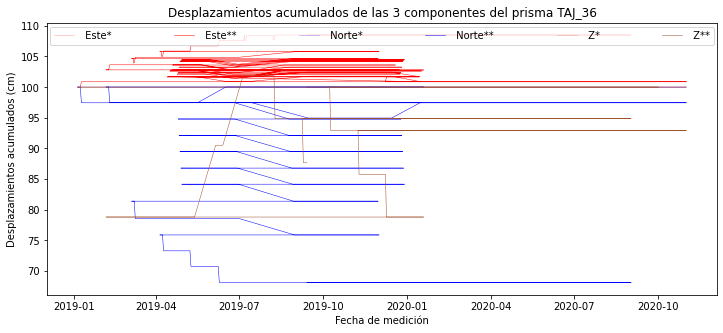

In [ ]:
for i in  range(0,end):
    print(i)
    pylab.close()
    plt.cla()
    plt.clf()
    #df1i=df1[df1['PointNo'] == h1[i]]
    df2i=df3[df3['PointNo'] == h1[i]]
    plt.plot()
    #plt.plot(df1i['Timee'],df1i['Este']*100, label=str(h1[i])+' Este');
    plt.plot(df2i['Timee'],df2i['Este*']*100, label=' Este*', linestyle='solid', linewidth=0.5, color='red',alpha=0.4);
    plt.plot(df2i['Timee'],df2i['Este**']*100, label=' Este**', linestyle='solid', linewidth=0.5, color='red');
    print(i)
    #plt.plot(df1i['Timee'],df1i['Norte']*100, label=str(h1[i])+' Norte');
    plt.plot(df2i['Timee'],df2i['Norte*']*100, label=' Norte*', linestyle='solid', linewidth=0.5, color='blue', alpha=0.4);
    plt.plot(df2i['Timee'],df2i['Norte**']*100, label=' Norte**', linestyle='solid', linewidth=0.5, color='blue');
    #plt.plot(df1i['Timee'],df1i['Elevation']*100, label=str(h1[i])+' Z');
    plt.plot(df2i['Timee'],df2i['Elevation*']*100, label=' Z*', linestyle='solid', linewidth=0.5, color='sienna',alpha=0.4);
    plt.plot(df2i['Timee'],df2i['Elevation**']*100, label=' Z**', linestyle='solid', linewidth=0.5, color='sienna');
    plt.legend(bbox_to_anchor=(0.045, 1.02, 0.91, .102), loc='lower left',
           ncol=6, mode="expand", borderaxespad=-2.75)
    #plt.xticks(rotation=90)
    plt.gcf().subplots_adjust(bottom=0.25)
    plt.gcf().set_size_inches(12,6)
    plt.xlabel('Fecha de medición')
    plt.ylabel('Desplazamientos acumulados (cm)')
    plt.title('Desplazamientos acumulados de las 3 componentes del prisma '+str(h1[i]))


In [ ]:
for i in  range(0,end):
    print(i)
    pylab.close()
    plt.cla()
    plt.clf()
    #df1i=df1[df1['PointNo'] == h1[i]]
    df2i=df3[df3['PointNo'] == h1[i]]
    plt.plot()
    #plt.plot(df1i['Timee'],df1i['Este']*100, label=str(h1[i])+' Este');
    plt.plot(df2i['Timee'],df2i['Este*']*100, label=' Este*', linestyle='solid', linewidth=0.6, color='red',alpha=0.5);
    plt.plot(df2i['Timee'],df2i['Este**']*100, label=' Este**', linestyle='solid', linewidth=0.6, color='red');
    print(i)
    #plt.plot(df1i['Timee'],df1i['Norte']*100, label=str(h1[i])+' Norte');
    plt.plot(df2i['Timee'],df2i['Norte*']*100, label=' Norte*', linestyle='solid', linewidth=0.6, color='blue', alpha=0.5);
    plt.plot(df2i['Timee'],df2i['Norte**']*100, label=' Norte**', linestyle='solid', linewidth=0.6, color='blue');
    #plt.plot(df1i['Timee'],df1i['Elevation']*100, label=str(h1[i])+' Z');
    plt.plot(df2i['Timee'],df2i['Elevation*']*100, label=' Z*', linestyle='solid', linewidth=0.6, color='sienna',alpha=0.5);
    plt.plot(df2i['Timee'],df2i['Elevation**']*100, label=' Z**', linestyle='solid', linewidth=0.5, color='sienna');
    plt.legend(bbox_to_anchor=(0.045, 1.02, 0.91, .102), loc='lower left',
           ncol=6, mode="expand", borderaxespad=-2.75)
    #plt.xticks(rotation=90)
    plt.gcf().subplots_adjust(bottom=0.25)
    plt.gcf().set_size_inches(12,6)
    plt.xlabel('Fecha de medición')
    plt.ylabel('Desplazamientos acumulados (cm)')
    plt.title('Desplazamientos acumulados de las 3 componentes del prisma '+str(h1[i]))
    prisma=str(h1[i])
    from google.colab import files
    print(i)
    plt.savefig('/content/drive/My Drive/anpris/'+prisma+'.png', dpi=300)
    print(i)
    pylab.close()
    plt.cla()
    plt.clf()

0
0
0
0
1
1
1
1
2
2
2
2
3
3
3
3
4
4
4
4
5
5
5
5
6
6
6
6
7
7
7
7
8
8
8
8
9
9
9
9
10
10
10
10
11
11
11
11


<Figure size 432x288 with 0 Axes>

In [ ]:
import glob
import os
import re
from reportlab.lib import utils
from reportlab.lib.units import inch
from reportlab.pdfgen import canvas

# modified by krlo aguinda from
#https://github.com/wizard1989/Unite-multiple-pictures-into-pdf

#----------------------------------------------------------------------
def sorted_nicely( l ):
    """ 
    # http://stackoverflow.com/questions/2669059/how-to-sort-alpha-numeric-set-in-python
 
    Sort the given iterable in the way that humans expect.
    """ 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)
#----------------------------------------------------------------------
def unite_pictures_into_pdf(outputPdfName, pathToSavePdfTo, pathToPictures, listWithImagesExtensions):    
    picturesInsideFolderWithPictures = []
    for iExtension in listWithImagesExtensions:
        picturesInsideFolderWithPictures.extend(glob.glob(pathToPictures + "/*." + iExtension))
        #data_files = glob.glob("/content/drive/My Drive/Colab Notebooks/*.txt")
    picturesInsideFolderWithPictures = sorted_nicely(picturesInsideFolderWithPictures)
    print(picturesInsideFolderWithPictures)
    filename = os.path.join(pathToSavePdfTo, outputPdfName + ".pdf")
    print(filename)
    print(filename)
    print(filename)
    c = canvas.Canvas(filename)
    i=0
    for iPicture in picturesInsideFolderWithPictures:
        print(iPicture)
        i=i+1
        img = utils.ImageReader(iPicture)
        #imagesize = img.getSize()
        #print(imagesize)
        #c.setPageSize(imagesize)
        c.setPageSize((842,595.5))
        c.drawImage(iPicture, 25, 90, width=800,height=400,mask=None)
        c.drawImage(logo, 55, 60, width=130,height=25)
        #---
        # choose some colors
        c.setStrokeColorRGB(0,0,0)
        c.setFillColorRGB(0/256,105/256,170/256)

        a=44.30
        b=48.04
        x1=752.68
        y1=489.73
        x2=148.72
        y2=47.99
        x3=269.41
        x4=686.35
        ex=1.0
        ey=2.0
        
        
        
        # draw a rec1
        c.rect(a,b,x1,y1, fill=0)
        # draw a rec2
        c.rect(a,b,x1,y2, fill=0)
        # draw a rec3
        c.rect(a,b,x2,y2, fill=0)
        # draw a rec4
        c.rect(a,b,x3,y2, fill=0)
        # draw a rec5
        c.rect(a,b,x4,y2, fill=0)
        # draw a rec3.1
        c.rect(a+x2,b,x3-x2,y2/5, fill=0)
        # draw a rec3.2
        c.rect(a+x2,b,x3-x2,2*y2/5, fill=0)
        # draw a rec3.3
        c.rect(a+x2,b,x4-x2,3*y2/5, fill=0)
        # draw a rec3.4
        c.rect(a+x2,b,x1-x2,4*y2/5, fill=0)
        # draw a rec3.5
        c.rect(a+x2,b,(x3-x2)/2,4*y2/5, fill=0)
        

        # make text go straight up
        c.setFillColorRGB(0,0,0)
        PROY="ME-PU-027-S005-AND-MIN-2019-0007"
        UNIDAD="Minsur SA - Unidad minera Pucamarca"
        INF="Ingeniero de Registro, Monitoreo y Análisis Geotécnico de las Instalaciones Principales"
        NAMEfig="REGISTRO HISTÓRICO DE DESPLAZAMIENTOS DE 3 EJES"
        REV="B"
        FECHA="14-01-2020"
        APROV="XXX"
        ELAB="YYY"
        num=4
        
        c.setFont("Helvetica", 6 )
        # text 1.1
        c.drawString(a+x2+ex, b+ey, "REVISIÓN:")
        # text 2.1
        c.drawString(a+x2+ex, b+ey+y2/5, "FECHA:")
        # text 3.1
        c.drawString(a+x2+ex, b+ey+2*y2/5, "APROVADO:")
        # text 4.1
        c.drawString(a+x2+ex, b+ey+3*y2/5, "ELABORADO:")
        # text 5.1-2
        c.setFont("Helvetica-Bold", 6 )
        c.drawCentredString(a+x2+(x3-x2)/2, b+ey+4*y2/5, PROY)
        
        # text 1.2
        c.drawCentredString(a+x2+3*(x3-x2)/4, b+ey, REV)
        # text 2.2
        c.drawCentredString(a+x2+3*(x3-x2)/4, b+ey+y2/5, FECHA)
        # text 3.2
        c.drawCentredString(a+x2+3*(x3-x2)/4, b+ey+2*y2/5, APROV)
        # text 4.2
        c.drawCentredString(a+x2+3*(x3-x2)/4, b+ey+3*y2/5, ELAB)
        
        # text 1-3.3
        c.setFont("Helvetica", 8.5 )
        c.drawCentredString(a+x3+(x4-x3)/2, b+ey+y2/5, NAMEfig)
        # text 4.3
        c.setFont("Helvetica-Bold", 6 )
        c.drawCentredString(a+x3+(x4-x3)/2, b+ey+3*y2/5, INF)
        # text 5.3
        c.setFont("Helvetica-Bold", 8.5 )
        c.drawCentredString(a+x3+(x4-x3)/2, b+ey+4*y2/5, UNIDAD)
        # text 1-4.4
        c.setFont("Helvetica", 22 )
        c.drawCentredString(a+x4+(x1-x4)/2, b+3*y2/10, "%s.%s" %(num,i))
        # text 5.4
        c.setFont("Helvetica", 6 )
        c.drawCentredString(a+x4+(x1-x4)/2, b+ey+4*y2/5, "GRÁFICA Nº")

        
        #---
        c.showPage()
    c.save()
    print("created", filename)
        
    
#----------------------------------------------------------------------

outputPdfName = "pdf_with_pictures5"
pathToSavePdfTo = '/content/drive/My Drive/anpris/'
pathToPictures = '/content/drive/My Drive/anpris/'
logo ='/content/drive/My Drive/jiji/logo/logo.PNG'
listWithImagesExtensions = ["png"]

unite_pictures_into_pdf(outputPdfName, pathToSavePdfTo, pathToPictures, listWithImagesExtensions)


['/content/drive/My Drive/anpris/PBN_03.png', '/content/drive/My Drive/anpris/PBN_05.png', '/content/drive/My Drive/anpris/PBN_14.png', '/content/drive/My Drive/anpris/PBN_22.png', '/content/drive/My Drive/anpris/PBN_29.png', '/content/drive/My Drive/anpris/PBN_39.png', '/content/drive/My Drive/anpris/PBN_42.png', '/content/drive/My Drive/anpris/PBN_45.png', '/content/drive/My Drive/anpris/TAJ_06.png', '/content/drive/My Drive/anpris/TAJ_24.png', '/content/drive/My Drive/anpris/TAJ_30.png', '/content/drive/My Drive/anpris/TAJ_36.png']
/content/drive/My Drive/anpris/pdf_with_pictures5.pdf
/content/drive/My Drive/anpris/pdf_with_pictures5.pdf
/content/drive/My Drive/anpris/pdf_with_pictures5.pdf
/content/drive/My Drive/anpris/PBN_03.png
/content/drive/My Drive/anpris/PBN_05.png
/content/drive/My Drive/anpris/PBN_14.png
/content/drive/My Drive/anpris/PBN_22.png
/content/drive/My Drive/anpris/PBN_29.png
/content/drive/My Drive/anpris/PBN_39.png
/content/drive/My Drive/anpris/PBN_42.png
/co

In [ ]:
excel=pd.DataFrame(sorted(list(set(df['PointNo']))))
excel.to_excel('/content/drive/My Drive/jiji/excel/excel.xlsx') 

In [ ]:
excelE = '/content/drive/My Drive/jiji/excel/excel.xlsx'
excelE = pd.read_excel(excelE, error_bad_lines=False, encoding = "ISO-8859-1") #, encoding = "ISO-8859-1", header=None
excelE

,Unnamed: 0,0,1,e,n,z
0,0,CASETA01_BN,0,NaN,NaN,NaN
1,1,CASETA01_ORIENTACION,1,1.0,1.0,1.0
2,2,CASETA02_ORIENTACION,1,1.0,1.0,1.0
3,3,CASETA02_TAJ,0,0.0,0.0,0.0
4,4,CASETA03_VIA,0,NaN,0.0,NaN
...,...,...,...,...,...,...
147,147,Via tajo 03,0,0.0,0.0,0.0
148,148,Via tajo 04,0,0.0,0.0,0.0
149,149,Via tajo 05,0,0.0,0.0,0.0
150,150,Via tajo 06,0,0.0,0.0,0.0


In [ ]:
import numpy as np
n = list(map(int, numbers))
print(n.sort())

None


In [ ]:
(n.split(','))

['(10', ' 4', ' 50', ' 32)']